# Lecture 8 : Data Visualization

* Making plots and static or interactive visualizations is one of the most important tasks in data analysis. It may be a part of the exploratory process; for example, helping identify outliers, needed data transformations, or coming up with ideas for models.

## 1. Matplotlib 

* Matplotlib is the most extensively used library of python for data visualization due to it's high flexibility and extensive functionality that it provides.

In [1]:
import pandas as pd
import numpy as np

# importing matplotlib
import matplotlib.pyplot as plt

# display plots in the notebook itself
%matplotlib inline

### Make a simple plot

* Let's create a basic plot to start working with!

In [2]:
height = [150,160,165,185]
weight = [70, 80, 90, 100]

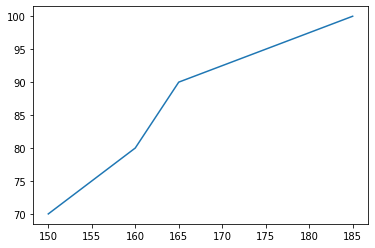

In [3]:
# draw the plot
plt.plot(height, weight)

* We pass two arrays as our input arguments to **plot()** method and invoke the required plot. Here note that the first array appears on the x-axis and second array appears on the y-axis of the plot.

### Title, Labels, and Legends
- Now that our first plot is ready, let us add the title, and name x-axis and y-axis using methods title(), xlabel() and ylabel() respectively.


In [4]:
help(plt.plot)

Help on function plot in module matplotlib.pyplot:

plot(*args, scalex=True, scaley=True, data=None, **kwargs)
    Plot y versus x as lines and/or markers.
    
    Call signatures::
    
        plot([x], y, [fmt], *, data=None, **kwargs)
        plot([x], y, [fmt], [x2], y2, [fmt2], ..., **kwargs)
    
    The coordinates of the points or line nodes are given by *x*, *y*.
    
    The optional parameter *fmt* is a convenient way for defining basic
    formatting like color, marker and linestyle. It's a shortcut string
    notation described in the *Notes* section below.
    
    >>> plot(x, y)        # plot x and y using default line style and color
    >>> plot(x, y, 'bo')  # plot x and y using blue circle markers
    >>> plot(y)           # plot y using x as index array 0..N-1
    >>> plot(y, 'r+')     # ditto, but with red plusses
    
    You can use `.Line2D` properties as keyword arguments for more
    control on the appearance. Line properties and *fmt* can be mixed.
    The f

In [12]:
calories = [65,75,85,95]

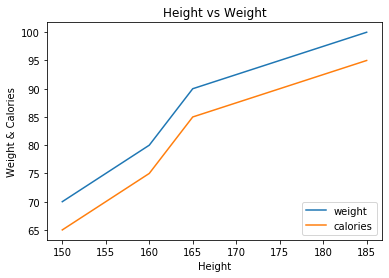

In [13]:
plt.title("Height vs Weight")
plt.xlabel('Height')
plt.ylabel('Weight & Calories')
plt.plot(height, weight )
plt.plot(height, calories)
plt.legend(labels = ['weight', 'calories'], loc = 'lower right')
plt.show()

- Adding **legends** is also simple in matplotlib, you can use the `legend()` which takes **labels** and **loc** as label names and location of legend in the figure as paremeters.

### Size, Colors, Markers and Line styles

- You can also specify the size of the figure using method `figure()` and passing the values as a tuple of the length of rows and columns to the argument figsize. 
- The values of length are considered to be in **inches**.

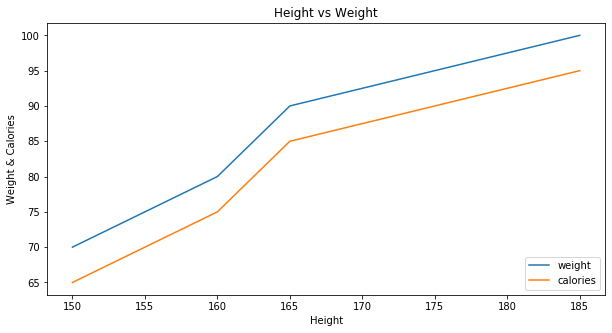

In [14]:
plt.figure(figsize = (10,5))
plt.title("Height vs Weight")
plt.xlabel('Height')
plt.ylabel('Weight & Calories')
plt.plot(height, weight )
plt.plot(height, calories)
plt.legend(labels = ['weight', 'calories'], loc = 'lower right')
plt.show()

* You can use Line2D properties as keyword arguments for more control on the appearance. 
* You can find several other options of Line2D style: https://matplotlib.org/stable/api/_as_gen/matplotlib.lines.Line2D.html

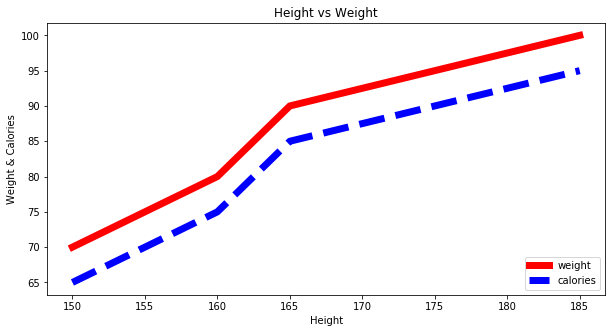

In [17]:
plt.figure(figsize = (10,5))
plt.title("Height vs Weight")
plt.xlabel('Height')
plt.ylabel('Weight & Calories')
plt.plot(height, weight , color='red', linestyle='solid', linewidth =7)
plt.plot(height, calories, color = 'blue', linestyle='dashed', linewidth =7)
plt.legend(labels = ['weight', 'calories'], loc = 'lower right')
plt.show()

### Line Chart

- With some datasets, you may want to understand changes in one variable as a function of time, or a similarly continuous variable.
- In matplotlib, **line chart** is the default plot when using the `plot()`: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html
- Let's visualize real data of historical data (to 14 December 2020) on the daily number of new reported COVID-19 cases and deaths worldwide (source from https://www.ecdc.europa.eu/en/publications-data/download-todays-data-geographic-distribution-covid-19-cases-worldwide)

In [18]:
df_covid = pd.read_csv('./covid19-worldwide2020.csv')

######## For Colab users ########
#import io
#from google.colab import files
#uploaded = files.upload()
#df_covid = pd.read_csv(io.StringIO(uploaded['covid19-worldwide2020.csv'].decode('utf-8')))

df_covid.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp
0,12/14/20,14,12,2020,746,6,Afghanistan,AF,AFG,38041757.0,Asia
1,12/13/20,13,12,2020,298,9,Afghanistan,AF,AFG,38041757.0,Asia
2,12/12/20,12,12,2020,113,11,Afghanistan,AF,AFG,38041757.0,Asia
3,12/11/20,11,12,2020,63,10,Afghanistan,AF,AFG,38041757.0,Asia
4,12/10/20,10,12,2020,202,16,Afghanistan,AF,AFG,38041757.0,Asia


* How does the number of 'cases' change monthly?

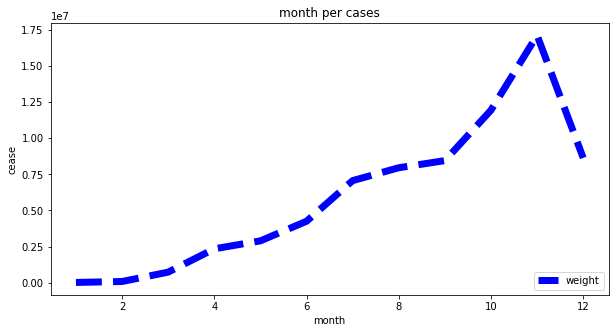

0      1
1      2
2      3
3      4
4      5
5      6
6      7
7      8
8      9
9     10
10    11
11    12
Name: month, dtype: int64

In [32]:

plt.figure(figsize = (10,5))
plt.title("month per cases")
plt.xlabel('month')
plt.ylabel('cease')
plt.plot(pd.DataFrame(df_covid.groupby('month').sum()['cases']).reset_index().month,pd.DataFrame(df_covid.groupby('month').sum()['cases']).reset_index().cases , color = 'blue', linestyle='dashed', linewidth =7)
plt.legend(labels = ['weight', 'calories'], loc = 'lower right')
plt.show()


pd.DataFrame(df_covid.groupby('month').sum()['cases']).reset_index().month

In [27]:
pd.DataFrame(df_covid.groupby('month').sum()['cases']).reset_index()

,month,cases
0,1,9799
1,2,74717
2,3,723736
3,4,2339589
4,5,2891989
5,6,4249352
6,7,7065668
7,8,7958523
8,9,8452473
9,10,11947273


### Bar Chart

- Suppose we want to have a look at **what is the total cases for each continent?** 
- A bar chart is another simple type of visualization that is used for categorical variables.
- You can use `plt.bar()` instead of `plt.plot()` to create a bar chart: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html

In [33]:
df_covid.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp
0,12/14/20,14,12,2020,746,6,Afghanistan,AF,AFG,38041757.0,Asia
1,12/13/20,13,12,2020,298,9,Afghanistan,AF,AFG,38041757.0,Asia
2,12/12/20,12,12,2020,113,11,Afghanistan,AF,AFG,38041757.0,Asia
3,12/11/20,11,12,2020,63,10,Afghanistan,AF,AFG,38041757.0,Asia
4,12/10/20,10,12,2020,202,16,Afghanistan,AF,AFG,38041757.0,Asia


In [34]:
cases_contienet = df_covid.groupby('continentExp')['cases'].sum()

In [35]:
cases_contienet

continentExp
Africa      2363291
America    30887593
Asia       16782019
Europe     21400012
Oceania       53437
Name: cases, dtype: int64

In [ ]:
x = cases_contienet.index
x = cases_contienet.index

### Histogram

- **Distribution of cases**
- Histograms are a very common type of plots when we are looking at data like height and weight, stock prices, waiting time for a customer, etc which are continuous in nature. 
- Histogram’s data is plotted within a range against its frequency. 
- Histograms are very commonly occurring graphs in probability and statistics and form the basis for various distributions like the normal -distribution, t-distribution, etc.
- You can use `plt.hist()` to draw a histogram: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html

* Plot the histogram of random normal distributions.

In [ ]:
comp1 = np.random.normal(0, 1, size=10000) # N(0, 1)
comp2 = np.random.normal(10, 2, size=10000) # N(10, 4)

values = pd.Series(np.concatenate([comp1, comp2]))

plt.hist(values, bins=100, alpha=0.3, color='red', density=True)
plt.show()

### Box Plots

- **Distribution of cases**
- Box plot shows the three quartile values of the distribution along with extreme values (https://en.wikipedia.org/wiki/Box_plot)
- The “whiskers” extend to points that lie within 1.5 IQR(inter-quartile range)s of the lower and upper quartile, and then observations that fall outside this range are displayed independently. 
- This means that each value in the boxplot corresponds to an actual observation in the data.
- https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.boxplot.html

### Scatter Plots

- **Relative distribution of total cases and deaths**
- It depicts the distribution of two variables using a cloud of points, where each point represents an observation in the dataset.
- This depiction allows the eye to infer a substantial amount of information about whether there is any meaningful relationship between them.
- https://matplotlib.org/stable/gallery/shapes_and_collections/scatter.html

### Bubble Plots

- **Relative distribution of cases, deaath and population**
- Let's make a scatter plot of cases and deaths and make the **size** of bubbles by the population.
- Bubble plots let you understand the interdependent relations among 3 variables. 

In [ ]:
cases_and_death2 = df_covid.groupby('countriesAndTerritories')[['cases', 'deaths', 'popData2019']].agg(
    {'cases':'sum', 'deaths':'sum', 'popData2019':'max'})

### Export figures

## 2. Seaborn

* Seaborn (https://seaborn.pydata.org/) is a Python data visualization library based on matplotlib.
* It provides a high-level interface for drawing attractive and informative statistical graphics. It provide choices for plot style and color defaults, defines simple high-level functions for common statistical plot types, and integrates with the functionality provided by Pandas DataFrames.
* The main idea of Seaborn is that it provides high-level commands to create a variety of plot types useful for statistical data exploration, and even some statistical model fitting.

In [ ]:
import seaborn as sns
sns.set()

### Line Chart

 * With some datasets, you may want to understand changes in one variable as a function of time, or a similarly continuous variable.
 * In seaborn, this can be accomplished by the **lineplot()** function: https://seaborn.pydata.org/generated/seaborn.lineplot.html

### Bar Chart

* In seaborn, you can create a barchart by simply using the **barplot** function: https://seaborn.pydata.org/generated/seaborn.barplot.html
* Notice that to achieve the same thing in matplotlib, we had to write extra code just to group the data category wise.
* And then we had to write much more code to make sure that the plot comes out correct.

### Histogram

- You can create a histogram in seaborn by simply using the **displot()**. There are multiple options that we can use which we will see further in the notebook.
- https://seaborn.pydata.org/generated/seaborn.displot.html

### Box plots

* You can use the **boxplot()** for creating boxplots in seaborn: https://seaborn.pydata.org/generated/seaborn.boxplot.html

### Scatter plot

* It depicts the distribution of two variables using a cloud of points, where each point represents an observation in the dataset. 
* This depiction allows the eye to infer a substantial amount of information about whether there is any meaningful relationship between them.
- You can use **relplot()** with the option of `kind=scatter` to plot a scatter plot in seaborn: https://seaborn.pydata.org/generated/seaborn.relplot.html

In [ ]:
cases_and_death3 = df_covid.groupby('countriesAndTerritories')[['cases', 'deaths', 'popData2019', 'continentExp']].agg(
    {'cases':'sum', 'deaths':'sum', 'popData2019':'max', 'continentExp':'max'})

### Hue semantic

* We can also add another dimension to the plot by coloring the points according to a third variable. In seaborn, this is referred to as using a “hue semantic”.*

### Bubble plot

- We utilize the **hue** semantic to color bubbles by populations and at the same time use it as size of individual bubbles.

### Category wise sub plot

- You can also create **plots based on category** in seaborn.
- We have created scatter plots for each continent.

### Heat map

* You can correlations among each column by heatmap in seaborn.

### Categorical plots:

 * boxplot() (with kind="box")

### Pair plots

* When you generalize joint plots to datasets of larger dimensions, you end up with pair plots. This is very useful for exploring correlations between multidimensional data, when you'd like to plot all pairs of values against each other.

* We can also demo this with the well-known Iris dataset, which lists measurements of petals and sepals of three iris species:

In [ ]:
iris = sns.load_dataset("iris")
iris.head()

## Exercise

### (1) Matplotlib

In [1]:
import pandas as pd

In [2]:
titles = pd.read_csv('./titles.csv')
cast = pd.read_csv('./cast.csv')

######## For Colab users ########
#import io
#from google.colab import files
#uploaded = files.upload()
#titles = pd.read_csv(io.StringIO(uploaded['titles.csv'].decode('utf-8')))

#uploaded = files.upload()
#cast = pd.read_csv(io.StringIO(uploaded['cast.csv'].decode('utf-8')))

FileNotFoundError: [Errno 2] No such file or directory: './cast.csv'

1. Plot the number of films for each year

In [ ]:
# your code here



2. Plot the n-values of the roles that Leonardo DiCaprio has played over his career.

In [ ]:
# your code here



3. Plot the number of casts for each type

   hint: Visualize your result by a bar chart using the 'type' column in the 'cast' dataframe.

In [ ]:
# your code here



### (2) Seaborn

In [ ]:
df_pokemon = pd.read_csv('./pokemon.csv')

#import io
#from google.colab import files
#uploaded = files.upload()
#df_pokemon = pd.read_csv(io.StringIO(uploaded['pokemon.csv'].decode('utf-8')))

4. Plot the histogram(distribution) of **Defense** column values.

In [ ]:
# your code here



5. Plot the scatter plot according to the following conditions
   * x-axis values: **HP**
   * y-axis values: **Attack**

In [ ]:
# your code here



6. Plot the scatter plot with hue semantic according to the following conditions
    * x-axis values: **Speed**
    * y-axis values: **Defense**
    * hue semantic: **Type 1**

In [ ]:
# your code here



7. Select only the columns of abilities ("HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed") and store it to the new dataframe (df_pokemon2). Then, obtain the correlation coefficients among the columns and visualize it as heatmap.

In [ ]:
# your code here



## References
* Data Analysis with Python: https://www.coursera.org/learn/data-analysis-with-python
* https://matplotlib.org/stable/index.html
* https://seaborn.pydata.org/